In [ ]:
! pip install -q Kaggle

from google.colab import files

files.upload()

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset


^C


Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
face-mask-12k-images-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml -P drive/gaze

!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml -P drive/gaze

--2022-12-09 14:38:17--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 341406 (333K) [text/plain]
Saving to: ‘drive/gaze/haarcascade_eye.xml.1’

haarcascade_eye.xml 100%[===================>] 333.40K  --.-KB/s    in 0.02s   

2022-12-09 14:38:17 (15.6 MB/s) - ‘drive/gaze/haarcascade_eye.xml.1’ saved [341406/341406]

--2022-12-09 14:38:17--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connect

In [ ]:
! unzip /content/face-mask-12k-images-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Face Mask Dataset/Train/WithoutMask/1855.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1856.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1857.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1858.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1859.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1860.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1861.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1862.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1863.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1864.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1865.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1866.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1867.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1868.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1869.png  
  inflating: Face Mask Dataset/Train/WithoutMask/

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Conv2D , AveragePooling2D , Flatten ,Rescaling ,MaxPooling2D
from tensorflow.keras.preprocessing.image import load_img
from keras import callbacks
from tensorflow.keras.utils import image_dataset_from_directory
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
datagen_1 = ImageDataGenerator(rescale = 1./255,zoom_range=0.2,rotation_range=40,fill_mode='nearest')
datagen_2 = ImageDataGenerator(rescale = 1/255)

In [ ]:

train = image_dataset_from_directory('/content/Face Mask Dataset/Train')
train_it = datagen_1.flow_from_directory('/content/Face Mask Dataset/Train',batch_size = 40 ,target_size=(64,64),shuffle=True, class_mode="categorical")
test_it = datagen_2.flow_from_directory('/content/Face Mask Dataset/Test', batch_size = 40 ,target_size=(64,64),shuffle=False,class_mode="categorical")
val_it =datagen_1.flow_from_directory('/content/Face Mask Dataset/Validation',batch_size = 40 ,target_size=(64,64),shuffle=True, class_mode="categorical")

batchX , batchY = train_it.next()

classes = train_it.class_indices
print(classes)


Found 10000 files belonging to 2 classes.
Found 10000 images belonging to 2 classes.
Found 992 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
{'WithMask': 0, 'WithoutMask': 1}


In [ ]:
#my Model
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation="relu",padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3), activation="relu",padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dense(2, activation="softmax"))

print(model.summary())
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 3, restore_best_weights = True, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 128)        0

In [ ]:
model.fit(train_it,epochs=40,validation_data=val_it,callbacks=[earlystopping])

Epoch 1/4
250/250 [==============================] - 145s 568ms/step - loss: 0.2087 - accuracy: 0.9128 - val_loss: 0.1187 - val_accuracy: 0.9600
Epoch 2/4
250/250 [==============================] - 123s 493ms/step - loss: 0.1130 - accuracy: 0.9591 - val_loss: 0.0791 - val_accuracy: 0.9725
Epoch 3/4
250/250 [==============================] - 123s 493ms/step - loss: 0.0800 - accuracy: 0.9713 - val_loss: 0.0607 - val_accuracy: 0.9762
Epoch 4/4
250/250 [==============================] - 126s 502ms/step - loss: 0.0612 - accuracy: 0.9782 - val_loss: 0.0490 - val_accuracy: 0.9800


In [ ]:
loss, acc = model.evaluate(test_it)

25/25 [==============================] - 4s 157ms/step - loss: 0.0575 - accuracy: 0.9819


In [ ]:
preds=model.predict(test_it)
y_pred = np.argmax(preds,axis=1)
y_actual = test_it.classes
cm = confusion_matrix(y_actual, y_pred)
print(cm)
print(preds)

25/25 [==============================] - 4s 156ms/step
[[467  16]
 [  2 507]]
[[9.7599077e-01 2.4009168e-02]
 [1.2688801e-01 8.7311190e-01]
 [9.9821091e-01 1.7891474e-03]
 ...
 [8.8434963e-04 9.9911559e-01]
 [2.3551390e-03 9.9764490e-01]
 [6.6805243e-02 9.3319470e-01]]


In [ ]:
labels = ['withMask', 'withoutMask']
print(classification_report(y_actual, y_pred, target_names=classes))

              precision    recall  f1-score   support

    WithMask       1.00      0.97      0.98       483
 WithoutMask       0.97      1.00      0.98       509

    accuracy                           0.98       992
   macro avg       0.98      0.98      0.98       992
weighted avg       0.98      0.98      0.98       992



In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
!wget --no-check-certificate \
   https://discoverymood.com/wp-content/uploads/2020/04/Mental-Strong-Women-min.jpg \
    -O test.jpg

--2022-12-09 16:09:04--  https://discoverymood.com/wp-content/uploads/2020/04/Mental-Strong-Women-min.jpg
Resolving discoverymood.com (discoverymood.com)... 35.188.119.86
Connecting to discoverymood.com (discoverymood.com)|35.188.119.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51223 (50K) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>]  50.02K  --.-KB/s    in 0.05s   

2022-12-09 16:09:04 (919 KB/s) - ‘test.jpg’ saved [51223/51223]



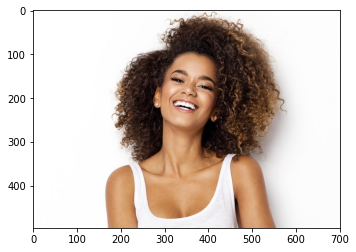

In [ ]:
img = cv2.imread('test.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [ ]:
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml \
    -O haarcascade_frontalface_default.xml





--2022-12-09 16:09:07--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.03s   

2022-12-09 16:09:07 (26.6 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [ ]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [ ]:
grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(grey,1.1,4)

In [ ]:

for x,y,w,h in faces:
  roi_grey = grey[ y:y+h , x:x+w ]
  roi_color =img[y:y+h , x:x+w ]
  cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  facess = face_cascade.detectMultiScale(roi_grey)
  if len(faces) == 0:
    print("Cannot detect face")
  else:
    for(ex,ey,ew,eh) in facess:
      face_roi= roi_color[ey : ey+eh, ex : ex+ew]

(140, 140, 3)

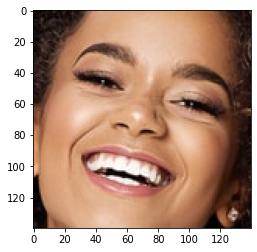

In [ ]:
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))
face_roi.shape

In [ ]:
final = cv2.resize(face_roi,(64,64))
final = np.expand_dims(final,axis=0)
final.shape


Text(0.5, 1.0, 'Without mask')

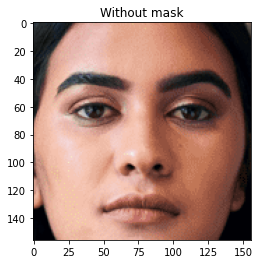

In [ ]:
pred_2 = model.predict(final,verbose=0)

if pred_2[0][1]  == float(1):
  status = 'With mask'
  
else:
  status = 'Without mask'
 
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))
plt.title(status) 



  